Prepare the environment
-----------------------

First we'll import various functions that we'll need for generating the report.

In [1]:
%matplotlib inline

from os import environ
from os.path import join, exists, expandvars
import pandas as pd
from skbio.draw import boxplots

from taxcompare.eval_framework import (get_expected_tables_lookup, 
                                       find_and_process_result_tables,
                                       compute_mock_results,
                                       compute_mantel,
                                       generate_pr_scatter_plots,
                                       boxplot_from_data_frame,
                                       heatmap_from_data_frame,
                                       method_by_dataset_a1,
                                       method_by_dataset_a2,
                                       performance_rank_comparisons,
                                       parameter_comparisons,
                                       method_by_dataset_iterations)

Configure local environment-specific values
-------------------------------------------

**This is the only cell that you will need to edit to generate reports locally.** After editing this cell, you can run all cells in this notebook to generate your analysis report. Some of the analyses make take a few minutes to run, and analyses at more specific taxonomic levels (e.g., genus or species) will be slower than analyses at more general taxonomic levels (e.g., phylum, class). 

**This cell will not run until you fill in a taxonomic level (``2`` through ``7``).**

In [2]:
## INDICATE THE PARAMETER IDS FOR YOUR METHOD AS A COMMA-SEPARATED LIST

new_param_ids = {'mothur':['confidence']}

In [3]:
## project_dir should be the directory where you've downloaded (or cloned) the 
## short-read-tax-assignment repository. 
project_dir = expandvars("$HOME/data/short-read-tax-assignment")

precomputed_results_dir = expandvars("$HOME/data/short-read-tax-assignment/data/precomputed-results/")
expected_results_dir = join(precomputed_results_dir, "simulated-community")

## results_dirs should contain the directory or directories where
## results can be found. By default, this is just the precomputed 
## results included with the project. If other results should be included, 
## absolute paths to those directories should be added to this list.
results_dirs = \
 [precomputed_results_dir,
  ]

## Taxonomic level at which analyses should be performed. Edit this to
## the desired taxonomic level. 
# 2: phylum, 3: class, 4: order, 5: family, 6: genus, 7: species
taxonomic_level = int(environ['taxonomic_level'])

## Reference choice (must be partial-ref or full-ref)
reference_choice = environ['reference_choice']

## Minimum number of times an OTU must be observed for it to be included in analyses. Edit this
## to analyze the effect of the minimum count on taxonomic results.
min_count = 1

# set to true if select tables should be written as Excel files (useful for publication)
write_xls_files = False

In [4]:
# Define the subdirectories where the data should be, and confirm that they exist.
simulated_results_dirs = [join(results_dir,"simulated-community") for results_dir in results_dirs]

for simulated_results_dir in simulated_results_dirs:
    assert exists(simulated_results_dir), "Simulated community result directory doesn't exist: %s" % simulated_results_dir

Find pre-computed tables, expected tables, and "query" tables
-------------------------------------------------------------

Next we'll use the paths defined above to find all of the tables that will be compared. These include the *pre-computed result* tables (i.e., the ones that the new methods will be compared to), the *expected result* tables (i.e., the tables containing the known composition of the mock microbial communities), and the *query result* tables (i.e., the tables generated with the new method(s) that we want to compare to the *pre-computed result* tables).

In [5]:
results = []
for simulated_results_dir in simulated_results_dirs:
    results += find_and_process_result_tables(simulated_results_dir)

In [6]:
# Uncomment for test runs (looks at a small subset of the data)

# from random import shuffle
# shuffle(results)
# results = results[:10]

In [7]:
## SPECIFY A NEW NAME FOR YOUR SUMMARY FILE

result_fp = join(precomputed_results_dir,'simulated-community', 'level%d-results-w-mothur.csv') % taxonomic_level

In [8]:

if exists(result_fp):
    simulated_results = pd.DataFrame.from_csv(result_fp)
else:
    expected_tables = get_expected_tables_lookup(expected_results_dir, level=taxonomic_level)
    simulated_results = compute_mock_results(results, expected_tables, taxonomy_level=taxonomic_level, min_count=min_count)
    simulated_results.to_csv()

In [9]:
refernece_choice_v = [e.endswith(reference_choice) for e in simulated_results['Parameters']]
simulated_results = simulated_results[refernece_choice_v]

Evalution 1: Compute and summarize precision, recall, and F-measure
-------------------------------------------------------------------

In this evaluation, we compute and summarize precision, recall, and F-measure of each result (pre-computed and query) based on the known composition of the simulated communities. We then summarize the results in two ways: first with boxplots, and second with a table of the top methods based on their F-measures.

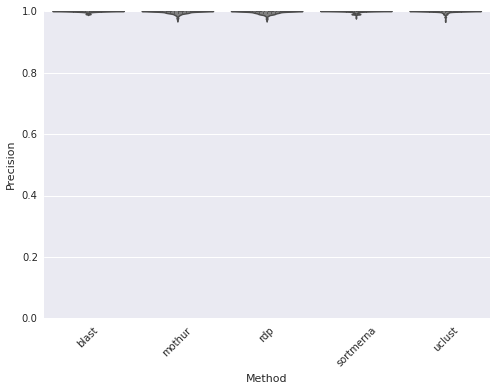

In [10]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="Precision")

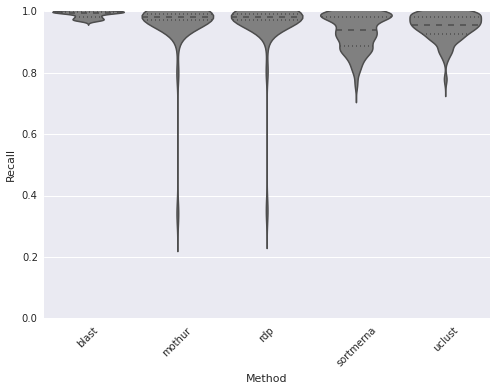

In [11]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="Recall")

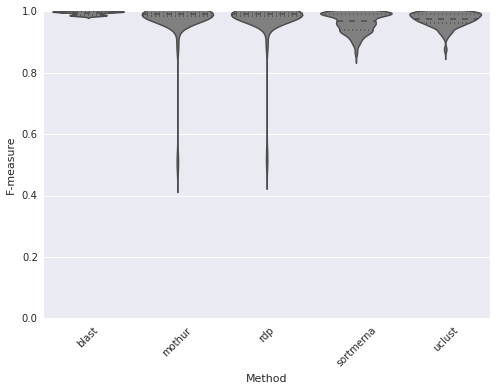

In [12]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="F-measure")

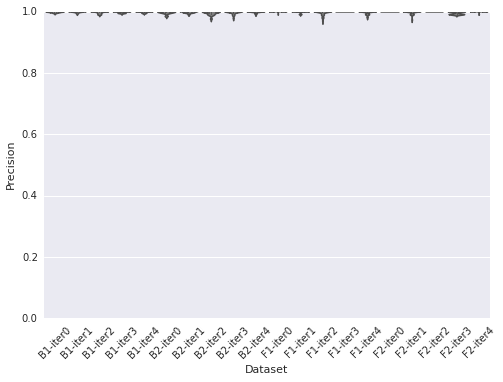

In [13]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="Precision")

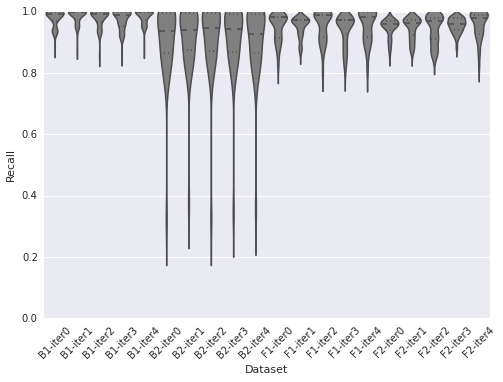

In [14]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="Recall")

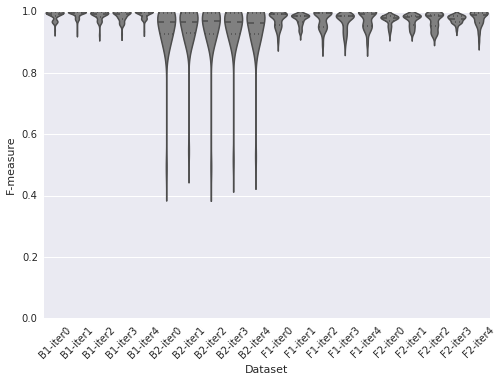

In [15]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="F-measure")

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


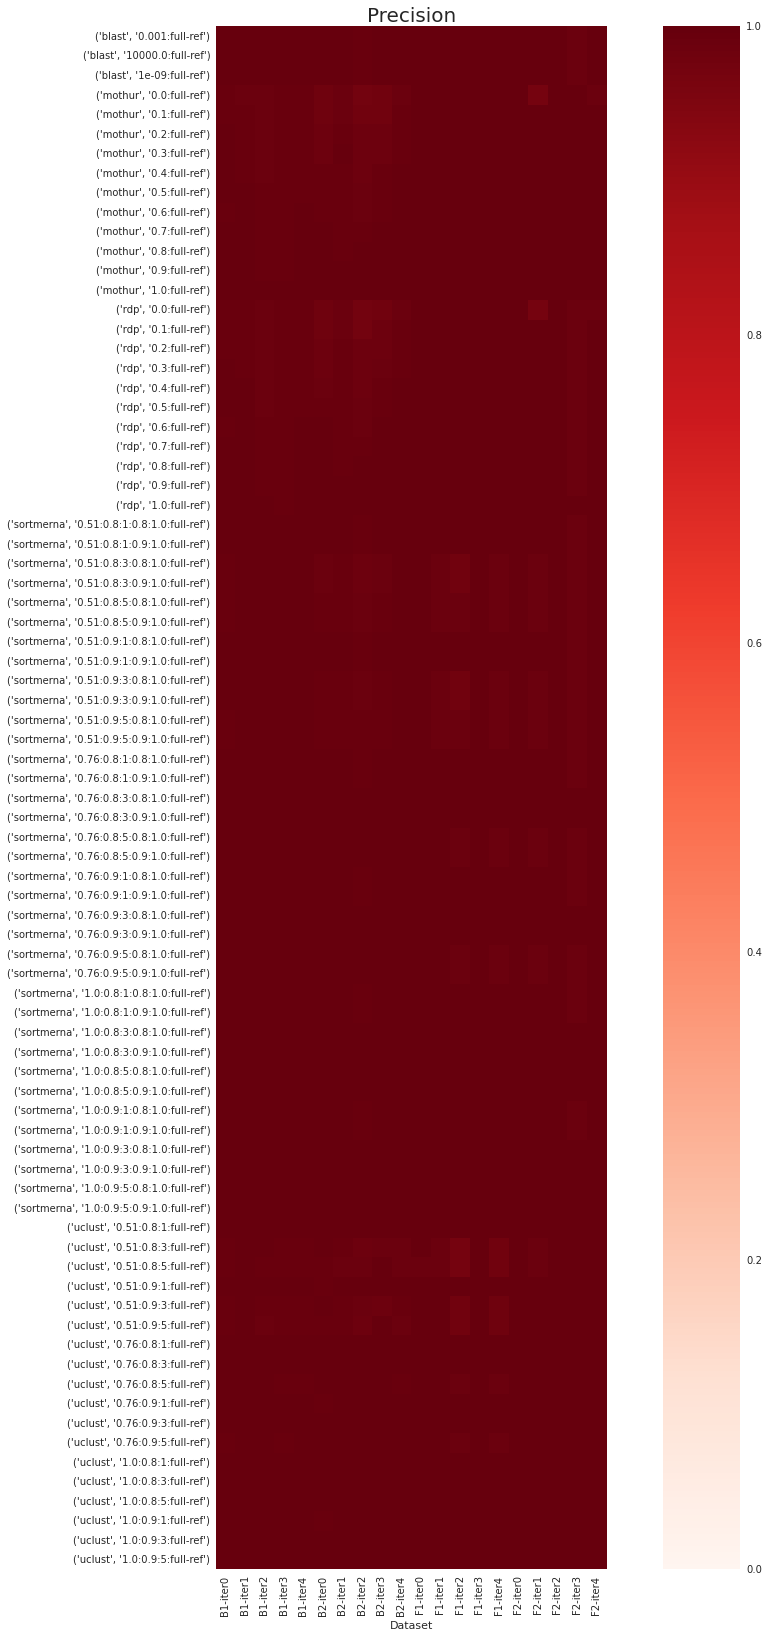

In [16]:
heatmap_from_data_frame(simulated_results, "Precision")

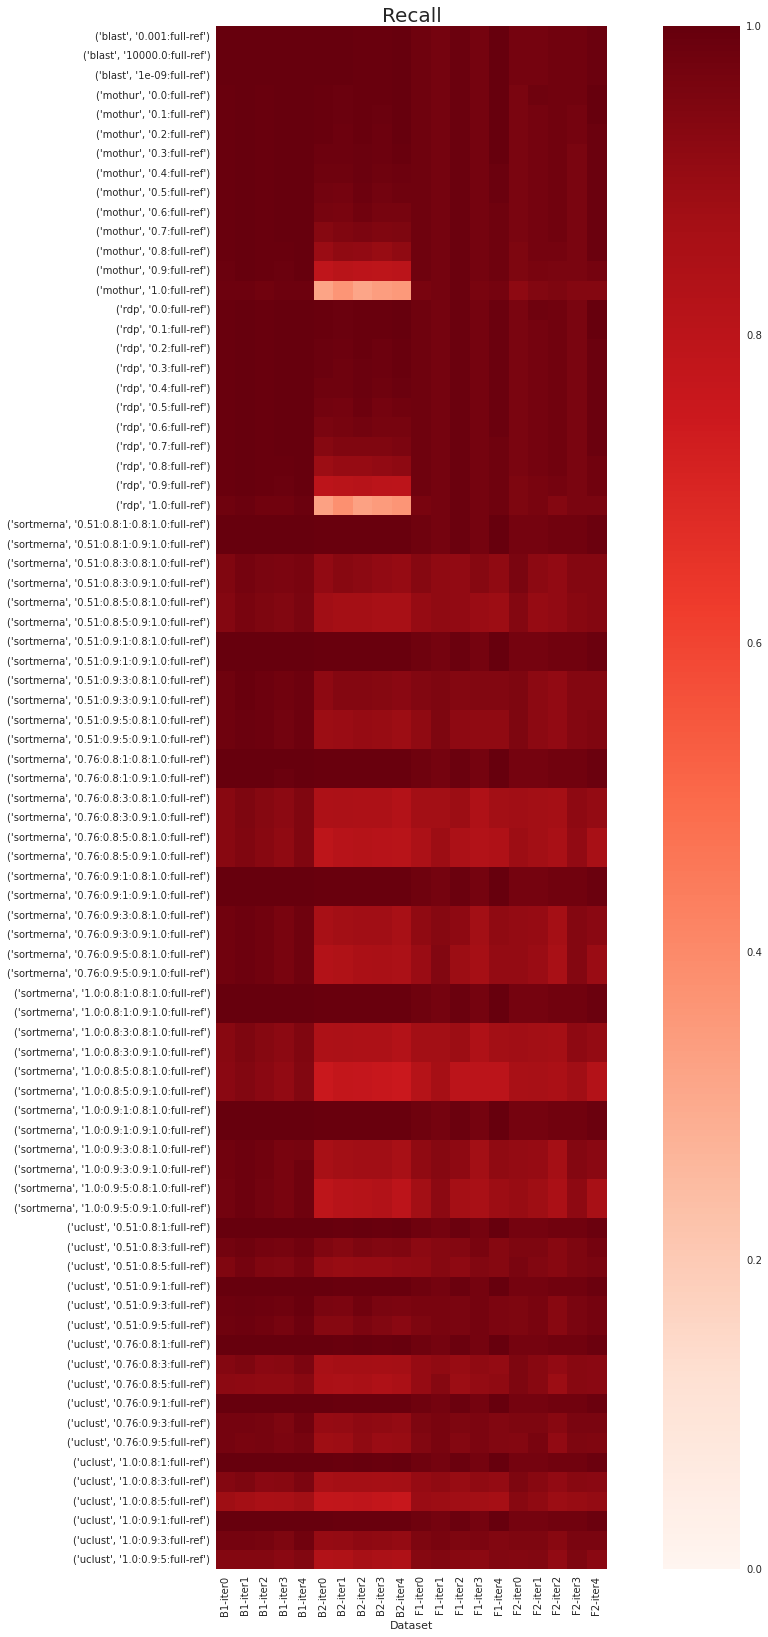

In [17]:
heatmap_from_data_frame(simulated_results, "Recall")

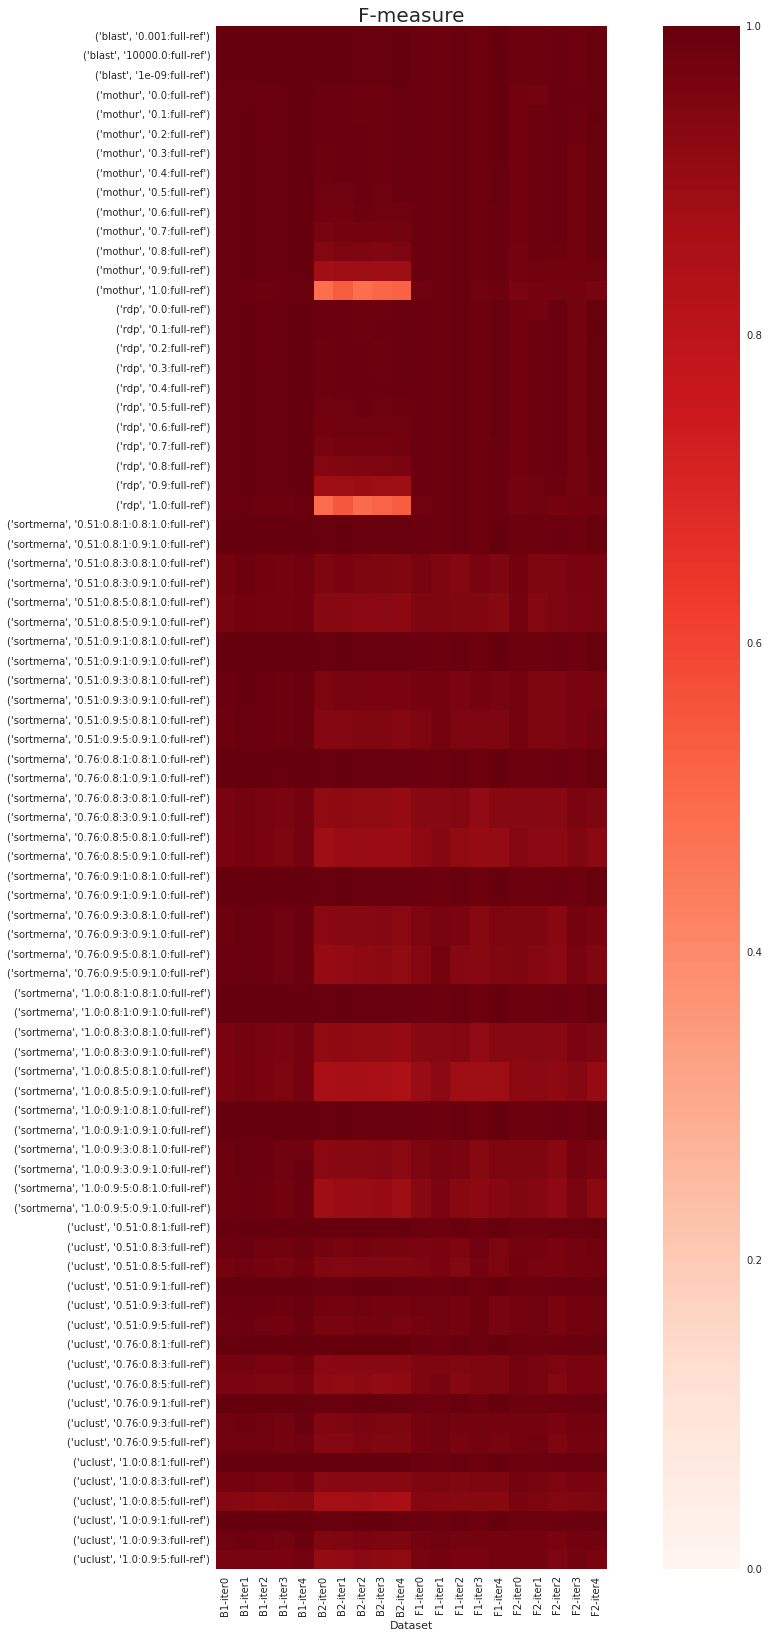

In [18]:
heatmap_from_data_frame(simulated_results, "F-measure")

In [19]:
method_by_dataset_a1(simulated_results, 'B1-iter0')

Method  Precision    Recall  F-measure
259      uclust   0.998054  1.000000   0.999026
140   sortmerna   0.998051  0.998051   0.998051
210       blast   0.998051  0.998051   0.998051
225         rdp   0.996094  0.994152   0.995122
2751     mothur   0.996094  0.994152   0.995122

In [20]:
method_by_dataset_a1(simulated_results, 'B2-iter0')

Method  Precision    Recall  F-measure
2147     uclust   0.998106  1.000000   0.999052
2113      blast   0.998099  0.996205   0.997151
2102  sortmerna   0.996198  0.994307   0.995252
2131        rdp   0.983114  0.994307   0.988679
3053     mothur   0.983114  0.994307   0.988679

In [21]:
method_by_dataset_a1(simulated_results, 'F1-iter0')

Method  Precision    Recall  F-measure
1908  sortmerna          1  0.981132   0.990476
2008     uclust          1  0.981132   0.990476
1978      blast          1  0.981132   0.990476
1988        rdp          1  0.981132   0.990476
3031     mothur          1  0.981132   0.990476

In [22]:
method_by_dataset_a1(simulated_results, 'F2-iter0')

Method  Precision  Recall  F-measure
1092  sortmerna          1    0.97   0.984772
1220     uclust          1    0.97   0.984772
1163      blast          1    0.97   0.984772
2912     mothur          1    0.96   0.979592
1172        rdp          1    0.96   0.979592

## Evaluation 2: Rank-based statistics comparing the performance of the optimal parameter setting run for each method on each data set.

*Count best* column indicates how many samples a given method achieved within one mean absolute deviation of the best result (which is why they sum to more than the total number of samples).

### Within-method comparisons of parameter performance

In [23]:
metrics = ['Precision', 'Recall', 'F-measure']

In [24]:
rdp_top_params = parameter_comparisons(simulated_results, "rdp", metrics=metrics)
rdp_top_params[:15]

F-measure  Precision  Recall
0.6:full-ref         16         13      18
0.7:full-ref         16         15      17
0.1:full-ref         15          9      19
0.3:full-ref         15          9      18
0.4:full-ref         15         11      18
0.5:full-ref         15         12      18
0.8:full-ref         15         15      16
0.2:full-ref         14          9      18
0.0:full-ref         13          7      20
0.9:full-ref          8         16       9
1.0:full-ref          4         20       4

In [25]:
uclust_top_params = parameter_comparisons(simulated_results, "uclust", metrics=metrics)
uclust_top_params[:15]

F-measure  Precision  Recall
0.51:0.8:1:full-ref         20         17      20
0.76:0.8:1:full-ref         20         17      20
1.0:0.9:1:full-ref          20         17      20
1.0:0.8:1:full-ref          20         17      20
0.76:0.9:1:full-ref         20         17      20
0.51:0.9:1:full-ref         20         17      20
0.51:0.9:3:full-ref         15          8      16
0.51:0.9:5:full-ref          8          9      11
0.51:0.8:3:full-ref          4          7      10
0.76:0.9:3:full-ref          3         20       3
0.76:0.9:5:full-ref          3         15       3
1.0:0.9:3:full-ref           3         20       3
0.51:0.8:5:full-ref          1          7       1
0.76:0.8:3:full-ref          0         20       0
0.76:0.8:5:full-ref          0         13       0

In [26]:
sortmerna_top_params = parameter_comparisons(simulated_results, "sortmerna", metrics=metrics)
sortmerna_top_params[:15]

F-measure  Precision  Recall
0.51:0.8:1:0.8:1.0:full-ref         20         13      20
0.76:0.8:1:0.8:1.0:full-ref         20         13      20
1.0:0.9:1:0.9:1.0:full-ref          20         13      20
1.0:0.9:1:0.8:1.0:full-ref          20         12      20
1.0:0.8:1:0.9:1.0:full-ref          20         13      20
1.0:0.8:1:0.8:1.0:full-ref          20         13      20
0.76:0.9:1:0.9:1.0:full-ref         20         13      20
0.51:0.8:1:0.9:1.0:full-ref         20         13      20
0.76:0.8:1:0.9:1.0:full-ref         20         13      20
0.76:0.9:1:0.8:1.0:full-ref         20         13      20
0.51:0.9:1:0.9:1.0:full-ref         20         13      20
0.51:0.9:1:0.8:1.0:full-ref         20         13      20
0.51:0.9:3:0.9:1.0:full-ref         13          9      13
0.51:0.9:3:0.8:1.0:full-ref         13          9      13
0.51:0.9:5:0.8:1.0:full-ref          6          8       6

In [27]:
blast_top_params = parameter_comparisons(simulated_results, "blast", metrics=metrics)
blast_top_params[:15]

F-measure  Precision  Recall
0.001:full-ref           20         20      20
10000.0:full-ref         20         20      20
1e-09:full-ref           20         20      20

In [28]:
## OUTPUT RESULTS FOR YOUR NEW METHOD

mothur_top_params = parameter_comparisons(simulated_results, "mothur", metrics=['F-measure'])
mothur_top_params[:15]

F-measure
0.3:full-ref         17
0.7:full-ref         17
0.2:full-ref         16
0.4:full-ref         16
0.5:full-ref         16
0.6:full-ref         16
0.0:full-ref         15
0.1:full-ref         15
0.8:full-ref         15
0.9:full-ref          7
1.0:full-ref          2

### Between-method performance comparisons based on best parameter set determined above

In [29]:
sort_field = 'F-measure'
display_fields = ['Method', 'Precision', 'Recall', 'F-measure']
mp_combs = {}
## ADD YOUR METHOD TO THE LIST OF METHODS TO BE COMPARED
for e in ['rdp', 'blast', 'sortmerna', 'uclust', 'mothur']:
    mp_combs[e] = parameter_comparisons(simulated_results, e, metrics=[sort_field]).index[0]


In [30]:
method_by_dataset_iterations(simulated_results, 'B1', mp_combs.items(), sort_field, display_fields)

Precision    Recall  F-measure
Method                                   
blast       0.999223  0.999221   0.999221
uclust      0.998843  0.999223   0.999032
sortmerna   0.999222  0.998833   0.999027
rdp         0.994627  0.996719   0.995670
mothur      0.994626  0.996529   0.995574

In [31]:
method_by_dataset_iterations(simulated_results, 'B2', mp_combs.items(), sort_field, display_fields)

Precision    Recall  F-measure
Method                                   
uclust      0.998841  0.996519   0.997675
blast       0.998446  0.995360   0.996900
sortmerna   0.997673  0.993813   0.995738
rdp         0.993779  0.977792   0.985659
mothur      0.993194  0.977983   0.985473

In [32]:
method_by_dataset_iterations(simulated_results, 'F1', mp_combs.items(), sort_field, display_fields)

Precision    Recall  F-measure
Method                                   
blast              1  0.982978   0.991386
sortmerna          1  0.982978   0.991386
uclust             1  0.982978   0.991386
rdp                1  0.981109   0.990447
mothur             1  0.981109   0.990442

In [33]:
method_by_dataset_iterations(simulated_results, 'F2', mp_combs.items(), sort_field, display_fields)

Precision    Recall  F-measure
Method                                   
uclust       1.00000  0.978381   0.989059
blast        0.99802  0.978381   0.988084
sortmerna    0.99802  0.978381   0.988084
mothur       1.00000  0.972459   0.986003
rdp          0.99798  0.972459   0.985028